# 2)Principal conponent analysis
PCA is a method to reduce the dimension of our data 

In [7]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt # NOTE: This was tested with matplotlib v. 2.1.0
 
#########################
#
# Data Generation Code, just to test algorithm
#
#########################
## In this example, the data is in a data frame called data.
## Columns are individual samples (i.e. cells)
## Rows are measurements taken for all the samples (i.e. genes)
## Just for the sake of the example, we'll use made up data...
# genes = ['gene' + str(i) for i in range(1,101)]
 
# wt = ['wt' + str(i) for i in range(1,6)]
# ko = ['ko' + str(i) for i in range(1,6)]
 
# data = pd.DataFrame(columns=[*wt, *ko], index=genes)
 
# for gene in data.index:
#     data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
#     data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

# data.head()



,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,540,529,562,486,515,754,713,682,748,691
gene2,104,127,135,130,126,717,671,670,702,678
gene3,857,863,849,892,848,53,49,64,54,63
gene4,657,648,614,642,668,572,569,600,593,539
gene5,17,24,28,29,24,287,287,271,284,280


/Users/rubenweitzman/Virtualenvs/project1_env/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


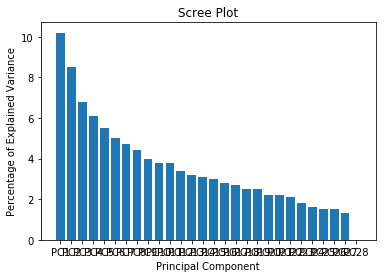

In [19]:
 
#########################
#
# Perform PCA on the data
#
#########################
# First center and scale the data


newFrame=pd.read_csv('ProtVSTranscript.csv')
subFrame=newFrame.iloc[:,2:-1].copy()
data=subFrame.iloc[:,0:28]
scaled_data = preprocessing.scale(data.T)

pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
 
#########################
#
# Draw a scree plot and a PCA plot
#
#########################
 
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.savefig('PCExplainedVariance.png')
plt.show()


We ran PCA to see if it possible to reduce the information contained in the frame to a smaller number of dimensions. However, it seems this is not the case, as no PC is vastly superior to anohter. 
THis is possibly due to the error being generated 
Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "

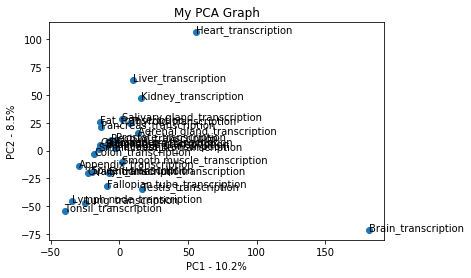

In [20]:
 
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=data.columns, columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.savefig('PCAdim2.png')
plt.show()


In [18]:
 
#########################
#
# Determine which genes had the biggest influence on PC1
#
#########################
 
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=data.index)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

3980     0.023709
752      0.023679
753      0.023679
4321     0.023602
4322     0.023602
480      0.023568
10410    0.023500
12034    0.023468
3004     0.023468
11289    0.023457
dtype: float64
